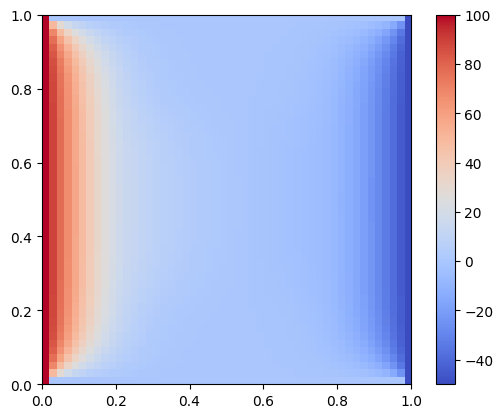

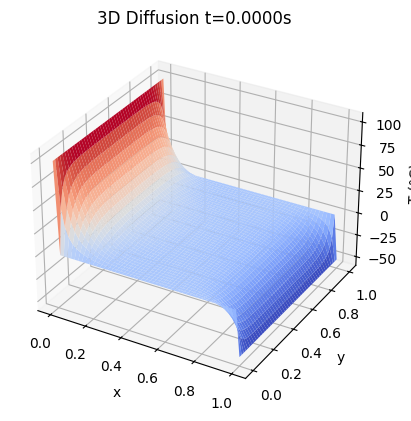

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 100  # Naikkan jadi 100 MB (atau lebih)
from IPython.display import HTML, Video

# Parameters
A = 0.1
B = 0.6
nx, ny = 50, 50
dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)
dt = 0.0001
steps = 1000  # Biar animasinya tidak terlalu lama

# Initialize
T = np.zeros((nx, ny))
T[:, 0] = 100
T[:, -1] = -50
inner_start = int(nx * 0.25)
inner_end = int(nx * 0.75)

# Update function
def update(T):
    T_new = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            K = B if (inner_start <= i < inner_end and inner_start <= j < inner_end) else A
            T_new[i, j] = T[i, j] + K * dt * (
                (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2 +
                (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2
            )
    return T_new

# --- Animasi 2D ---
def animate_2D(T_init, steps):
    T = T_init.copy()
    fig, ax = plt.subplots()
    cax = ax.imshow(T, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm', animated=True)
    fig.colorbar(cax)

    def animate(i):
        nonlocal T
        T = update(T)
        cax.set_array(T)
        return cax,

    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=True)
    return ani

# --- Animasi 3D ---
def animate_3D(T_init, steps):
    T = T_init.copy()
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    surf = [ax.plot_surface(X, Y, T, cmap='coolwarm')]

    def animate(i):
        nonlocal T, surf
        T = update(T)
        ax.clear()
        ax.set_zlim(-60, 110)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('T (°C)')
        ax.set_title(f'3D Diffusion t={i*dt:.4f}s')
        surf[0] = ax.plot_surface(X, Y, T, cmap='coolwarm')
        return surf

    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=False)
    return ani

# Animasi 2D
T0 = T.copy()  # Reset ulang
ani2d = animate_2D(T0, steps)
ani2d.save("diffusion_2d.mp4", writer="ffmpeg", fps=20)

# Animasi 3D
T0 = T.copy()  # Reset ulang lagi
ani3d = animate_3D(T0, steps)
ani3d.save("diffusion_3d.mp4", writer="ffmpeg", fps=20)

# Tampilkan kedua video dalam satu cell
display(Video("diffusion_2d.mp4"))
display(Video("diffusion_3d.mp4"))


Stability factor: 0.025230000000000006
✅ Stabil.


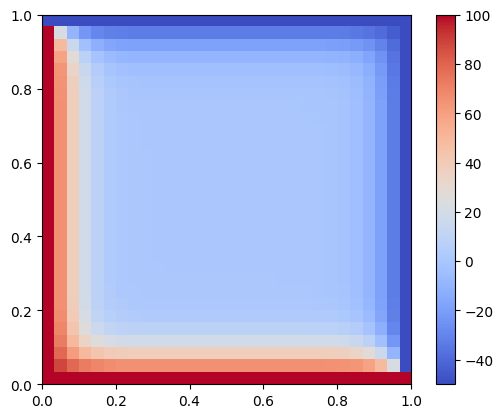

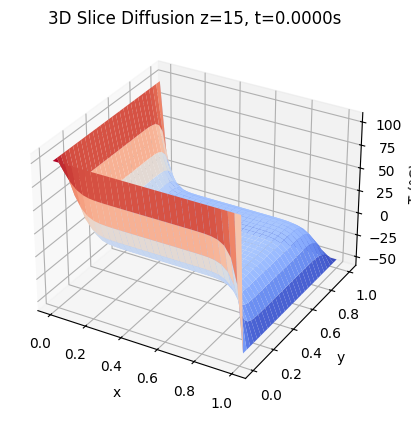

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 100  # Naikkan jadi 100 MB (atau lebih)
from IPython.display import HTML, Video

# Parameters
A = 0.1
B = 0.6
nx, ny, nz = 30, 30, 30

dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)
dz = 1.0 / (nz - 1)
dt = 0.0001
steps = 300  # Disesuaikan agar animasi tidak terlalu berat

# Cek kestabilan untuk k
K = A
stability_factor = K * dt * (1/dx**2 + 1/dy**2 + 1/dz**2)
print("Stability factor:", stability_factor)
if stability_factor > 0.5:
    print("⚠️ Tidak stabil! Kurangi dt atau perbesar dx, dy, dz.")
else:
    print("✅ Stabil.")

# Initialize
T = np.zeros((nx, ny, nz))
T[:, 0, :] = 100      # depan panas
T[:, -1, :] = -50     # belakang dingin
T[0, :, :] = 100      # kiri panas
T[-1, :, :] = -50     # kanan dingin
T[:, :, 0] = 100      # bawah panas
T[:, :, -1] = -50     # atas dingin

inner_start = int(nx * 0.25)
inner_end = int(nx * 0.75)

# Update function untuk difusi 3D
def update(T):
    T_new = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            for k in range(1, nz - 1):
                K = B if (inner_start <= i < inner_end and inner_start <= j < inner_end and inner_start <= k < inner_end) else A
                T_new[i, j, k] = T[i, j, k] + K * dt * (
                    (T[i + 1, j, k] - 2 * T[i, j, k] + T[i - 1, j, k]) / dx**2 +
                    (T[i, j + 1, k] - 2 * T[i, j, k] + T[i, j - 1, k]) / dy**2 +
                    (T[i, j, k + 1] - 2 * T[i, j, k] + T[i, j, k - 1]) / dz**2
                )
    return T_new

# Animasi 2D
def animate_2D(T_init, steps):
    T = T_init.copy()
    mid_z = nz // 2
    fig, ax = plt.subplots()
    cax = ax.imshow(T[:, :, mid_z], extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm', animated=True)
    fig.colorbar(cax)

    def animate(i):
        nonlocal T
        T = update(T)
        cax.set_array(T[:, :, mid_z])
        return cax,

    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=True)
    return ani

# Animasi 3D
def animate_3D(T_init, steps):
    T = T_init.copy()
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    X, Y = np.meshgrid(x, y)
    mid_z = nz // 2

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    surf = [ax.plot_surface(X, Y, T[:, :, mid_z], cmap='coolwarm')]

    def animate(i):
        nonlocal T, surf
        T = update(T)
        ax.clear()
        ax.set_zlim(-60, 110)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('T (\u00b0C)')
        ax.set_title(f'3D Slice Diffusion z={mid_z}, t={i*dt:.4f}s')
        surf[0] = ax.plot_surface(X, Y, T[:, :, mid_z], cmap='coolwarm')
        return surf

    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=False)
    return ani

# Animasi 2D
T0 = T.copy()  # Reset ulang
ani2d = animate_2D(T0, steps)
ani2d.save("diffusion_3d_slice_2d.mp4", writer="ffmpeg", fps=20)

# Animasi 3D
T0 = T.copy()  # Reset ulang lagi
ani3d = animate_3D(T0, steps)
ani3d.save("diffusion_3d_slice_3d.mp4", writer="ffmpeg", fps=20)

# Tampilkan kedua video dalam satu cell
display(Video("diffusion_3d_slice_2d.mp4"))
display(Video("diffusion_3d_slice_3d.mp4"))

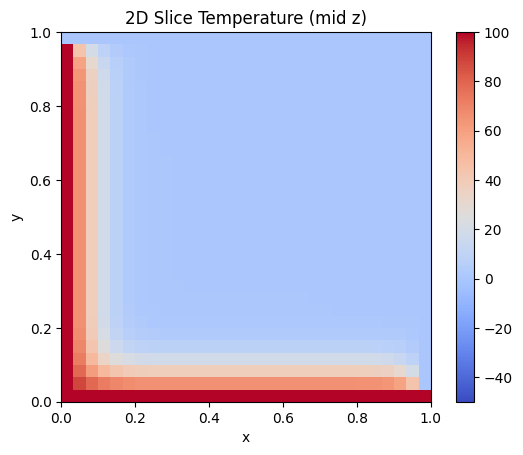

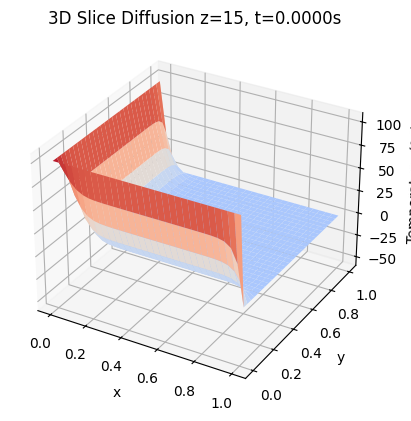

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 100  # Naikkan jadi 100 MB (atau lebih)
from IPython.display import HTML, Video

# Parameters
A = 0.1
B = 0.6
nx, ny, nz = 30, 30, 30

dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)
dz = 1.0 / (nz - 1)
dt = 0.0001
steps = 300

# Initialize temperature
T = np.zeros((nx, ny, nz))
# Boundary panas/dingin
T[:, 0, :] = 100      # depan panas (ujung)
T[:, -1, :] = 0       # belakang dingin (ubah ke 0 agar beda dengan interior)
T[0, :, :] = 100      # kiri panas (ujung)
T[-1, :, :] = 0       # kanan dingin
T[:, :, 0] = 100      # bawah panas (ujung)
T[:, :, -1] = 0       # atas dingin

inner_start = int(nx * 0.25)
inner_end = int(nx * 0.75)

def update(T):
    T_new = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            for k in range(1, nz - 1):
                K = B if (inner_start <= i < inner_end and inner_start <= j < inner_end and inner_start <= k < inner_end) else A
                T_new[i, j, k] = T[i, j, k] + K * dt * (
                    (T[i + 1, j, k] - 2 * T[i, j, k] + T[i - 1, j, k]) / dx**2 +
                    (T[i, j + 1, k] - 2 * T[i, j, k] + T[i, j - 1, k]) / dy**2 +
                    (T[i, j, k + 1] - 2 * T[i, j, k] + T[i, j, k - 1]) / dz**2
                )
    return T_new

mid_z = nz // 2
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# Animasi 2D slice tengah z
def animate_2D(T_init, steps):
    T = T_init.copy()
    fig, ax = plt.subplots()
    cax = ax.imshow(T[:, :, mid_z], extent=[0,1,0,1], origin='lower', cmap='coolwarm', vmin=-50, vmax=100)
    fig.colorbar(cax)
    ax.set_title('2D Slice Temperature (mid z)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    def animate(i):
        nonlocal T
        T = update(T)
        cax.set_array(T[:, :, mid_z])
        return cax,

    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=True)
    return ani

# Animasi 3D surface slice tengah z
def animate_3D(T_init, steps):
    T = T_init.copy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlim(-60, 110)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Temperature (°C)')
    ax.set_title(f'3D Slice Diffusion z={mid_z}')

    surf = [ax.plot_surface(X, Y, T[:, :, mid_z], cmap='coolwarm', vmin=-50, vmax=100)]

    def animate(i):
        nonlocal T, surf
        T = update(T)
        ax.clear()
        ax.set_zlim(-60, 110)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Temperature (°C)')
        ax.set_title(f'3D Slice Diffusion z={mid_z}, t={i*dt:.4f}s')
        surf[0] = ax.plot_surface(X, Y, T[:, :, mid_z], cmap='coolwarm', vmin=-50, vmax=100)
        return surf

    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=False)
    return ani

# Save dan tampilkan animasi
T0 = T.copy()
ani2d = animate_2D(T0, steps)
ani2d.save("diffusion_3d_slice_2d.mp4", writer="ffmpeg", fps=20)

T0 = T.copy()
ani3d = animate_3D(T0, steps)
ani3d.save("diffusion_3d_slice_3d.mp4", writer="ffmpeg", fps=20)

display(Video("diffusion_3d_slice_2d.mp4"))
display(Video("diffusion_3d_slice_3d.mp4"))
